# **The Sparks Foundation Summer Internship**

##Task 1 : Prediction using Supervised ML

###Author: **Rahul Raghunath Bodanki**



Problem Statement : Predict the percentage of an student based on the no. of    study hours. Link for the raw dataset: http://bit.ly/w-data



###Linear Regression with Python Scikit Learn
For this task we will create the Linear Regression model(by using simple linear regression involving two variables) and Python Scikit-Learn(sklearn) library for machine learning.



In [128]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [129]:
#reading the dataset
raw_data= pd.read_csv('http://bit.ly/w-data')
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [130]:
#checking if there is any data missing
raw_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [131]:
#there is no missing data in the dataset

In [132]:
#all about the dataset
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


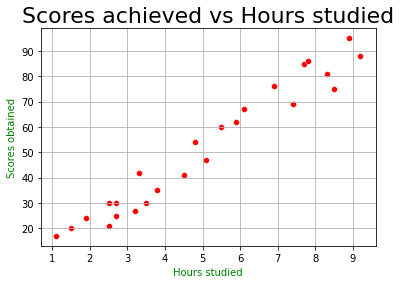

In [133]:
#ploting the raw data
sns.scatterplot(y=raw_data['Scores'],x=raw_data['Hours'], color = 'red')
plt.title('Scores achieved vs Hours studied',size=22, c= 'black')
plt.xlabel('Hours studied',c ='green')
plt.ylabel('Scores obtained',c='green')
plt.grid()
plt.show()

In [134]:
raw_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here, it looks like there exists a correlation between "Marks" and "Hours Studied", we can confirm that this can be solved using a regression model.

In [135]:
#defining x and y for training

x = raw_data.iloc[ : , :-1]
y = raw_data.iloc[ : ,-1]

In [136]:
# Splitting the Dataset into 80:20 ( 80% data for training and 20% data for testing)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)
print('splitting is done')

splitting is done


**Training the Regression model**

In [137]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print('Training the model is complete')

Training the model is complete


**Testing the Regression model**

In [138]:
y_predicted = reg.predict(x_test)
y_predicted

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [139]:
Predicted_df = pd.DataFrame( { 'Original scores ': y_test, 
                               'Predicted scores ': y_predicted,
                               'Error': (y_test-y_predicted)})
Predicted_df

,Original scores,Predicted scores,Error
5,20,17.042892,2.957108
2,27,33.516954,-6.516954
19,69,74.217577,-5.217577
16,30,26.733516,3.266484
11,62,59.681640,2.318360
22,35,39.331329,-4.331329
17,24,20.919142,3.080858
24,86,78.093827,7.906173
23,76,69.372265,6.627735


In [140]:
# Model Accuracy
model_acc = reg.score(x_test,y_test)
model_acc*100

95.55700801388127

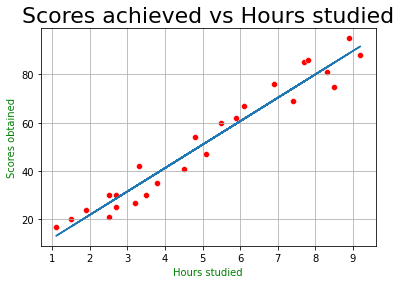

In [141]:
#plotting the regression line
line = reg.coef_*x + reg.intercept_
plt.plot(x, line)
#ploting the raw data
sns.scatterplot(y=raw_data['Scores'],x=raw_data['Hours'], color = 'red')
plt.title('Scores achieved vs Hours studied',size=22, c= 'black')
plt.xlabel('Hours studied',c ='green')
plt.ylabel('Scores obtained',c='green')
plt.grid()
plt.show()

In [142]:
# Mean absolute error : It measures the average magnitude of the errors in a set of predictions, without considering their direction.

print('Mean absolute error', mean_absolute_error(y_test,y_predicted))

Mean absolute error 4.691397441397446


##Now, we will predict the score of student when he studies 9.25 hours per day.

In [143]:
hrs = [[5.25]]
pred_score = reg.predict(hrs) 
print("If a student studies for *{}*, he'll be able to get score of *{}*".format(hrs[0][ 0],pred_score[0]))

If a student studies for *5.25*, he'll be able to get score of *53.38273438273438*
